In [194]:
#setup
import numpy as np
import pandas as pd
from PIL import Image
from IPython.display import display

from sklearn.decomposition import PCA

import cv2

import matplotlib.pyplot as plt

## Zadanie 2. (2 punkty)
Zapoznaj się z dołączonymi do listy zadań danymi (pochodzącymi z bazy danych AR Face Database1 stworzonej przez prof. Aleixa Martineza z Ohio State University i udostępnionej przez niego na potrzeby naszego wykładu). Przygotowany przeze mnie zbiór danych zawiera odpowiednio przeskalowane zdjęcia twarzy o rozdzielczości 82 x 60 pikseli w 256 odcieniach szarości każdy (zatem zdjęcie twarzy można utożsamić z punktem przestrzeni 82 x 60 = 4920 wymiarowej). Wczytaj pierwszy zestaw danych (zawierający 250 zdjęć – po 5 zdjęć każdej z 50 osób), spróbuj zredukować ich wymiarowość. Dokładnie przeanalizuj wyniki (jak można interpretować uzyskane wektory własne?).

In [222]:
def draw_face(img):
    img = img.reshape(60, 82).T
    display(Image.fromarray(img))

In [189]:
data = pd.read_csv('data/ri_train.csv', header=None).T.astype(np.uint8).values
data.shape

(250, 4920)

In [190]:
pca = PCA(64)

In [191]:
data_proj = pca.fit_transform(data)

In [209]:
data_proj.shape

(250, 64)

Visualize top 10 components


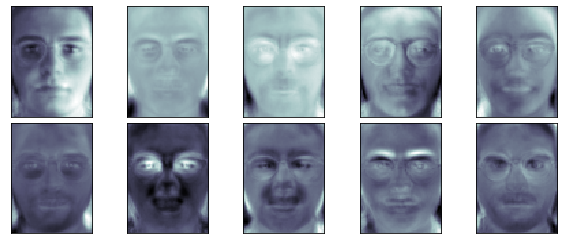

In [220]:
print('Visualize top 10 components')
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(10):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(pca.components_[i,:], (60,82)).T, cmap=plt.cm.bone, interpolation='nearest')

Original photo #0


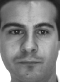

Reconstruced photo #0


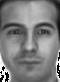




Original photo #1


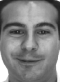

Reconstruced photo #1


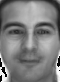




Original photo #2


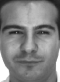

Reconstruced photo #2


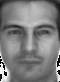




Original photo #3


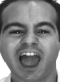

Reconstruced photo #3


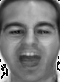




Original photo #4


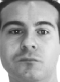

Reconstruced photo #4


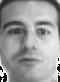




Original photo #5


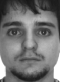

Reconstruced photo #5


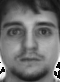




Original photo #6


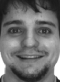

Reconstruced photo #6


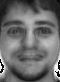




Original photo #7


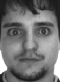

Reconstruced photo #7


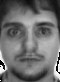




Original photo #8


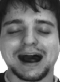

Reconstruced photo #8


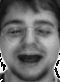




Original photo #9


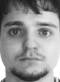

Reconstruced photo #9


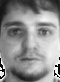

In [223]:
inv_proj = pca.inverse_transform(data_proj).astype(np.uint8)
for i in range(10):
    print(f'Original photo #{i}')
    draw_face(data[i])
    print(f'Reconstruced photo #{i}')
    draw_face(inv_proj[i])
    print('\n\n')